In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001DE8EBD9048>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001DE92D0E470>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001DE92D0E6D8>)

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.train.labels.shape

(55000, 10)

In [7]:
import numpy as np
from matplotlib import pyplot as plt

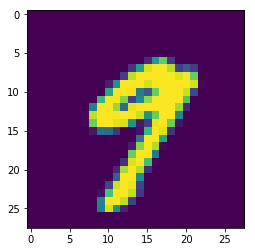

In [8]:
first_image = mnist.test.images[20]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape(28,28)
plt.imshow(first_image)
plt.show()

In [9]:
#units in each layer
n_inputs = 784
n_units_h1 = 256
n_units_h2 = 256
n_output = 10

In [10]:
#weights and biases
weights = {
    'h1' : tf.Variable(tf.random_normal(shape = [n_inputs, n_units_h1])),
    'h2' : tf.Variable(tf.random_normal(shape = [n_units_h1, n_units_h2])),
    'out' : tf.Variable(tf.random_normal(shape = [n_units_h2, n_output]))
}

biases = {
    'h1' : tf.Variable(tf.random_normal(shape = [n_units_h1])),
    'h2' : tf.Variable(tf.random_normal(shape = [n_units_h2])),
    'out' : tf.Variable(tf.random_normal(shape = [n_output]))
}

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
#forward_propagation
def forwardPropagation(x, weights, biases):
    input_h1 = tf.add(tf.matmul(x , weights['h1']), biases['h1'])
    output_h1 = tf.nn.relu(input_h1)
    
    input_h2 = tf.add(tf.matmul(output_h1 , weights['h2']), biases['h2'])
    output_h2 = tf.nn.relu(input_h2)
    
    output = tf.add(tf.matmul(output_h2 , weights['out']), biases['out'])
    return output

In [12]:
x = tf.placeholder("float", [None, n_inputs])
y = tf.placeholder(tf.int32, [None, n_output])
prediction = forwardPropagation(x, weights, biases)

In [13]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=y))

In [14]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [16]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimize], feed_dict = {x:batch_x, y:batch_y})
        total_cost += c
    print(total_cost)

26770.20073699951
4871.085844308138
2684.213784538814
1954.7326151655568
1374.9995896877306
1309.315090718415
1165.6296004740288
1026.6740066867615
898.5910544107701
862.7627307273102
726.7934214915717
599.818384347794
577.8136346650625
478.3648190958903
437.1507240003686
362.5273512148685
397.5396636971716
345.4927939589106
310.96161587474035
271.80951534856797
255.13508361153194
173.54324870559438
152.2488800679867
153.99982532370345
171.69466644227504


In [21]:
pred = tf.argmax(prediction, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(pred, correct_labels)
p, correct_prediction = sess.run([pred, correct_predictions], feed_dict={x:mnist.train.images, y:mnist.train.labels})
correct_prediction.sum()

53268

In [22]:
preds = forwardPropagation(x, weights, biases)
pred = tf.argmax(prediction, 1)
y = tf.placeholder(tf.int32, [None, n_output])
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(pred, correct_labels)
p, target, answer = sess.run([pred, correct_labels, correct_predictions], feed_dict={x:mnist.test.images, y:mnist.test.labels})
answer.sum()

9510